### FIFA 22 complete player dataset

About Dataset
Context
The datasets provided include the players data for the Career Mode from FIFA 15 to FIFA 22 ("players_22.csv"). The data allows multiple comparisons for the same players across the last 8 version of the videogame.

Some ideas of possible analysis:

Historical comparison between Messi and Ronaldo (what skill attributes changed the most during time - compared to real-life stats);

Ideal budget to create a competitive team (at the level of top n teams in Europe) and at which point the budget does not allow to buy significantly better players for the 11-men lineup. An extra is the same comparison with the Potential attribute for the lineup instead of the Overall attribute;

Sample analysis of top n% players (e.g. top 5% of the player) to see if some important attributes as Agility or BallControl or Strength have been popular or not acroos the FIFA versions. An example would be seeing that the top 5% players of FIFA 20 are faster (higher Acceleration and Agility) compared to FIFA 15. The trend of attributes is also an important indication of how some attributes are necessary for players to win games (a version with more top 5% players with high BallControl stats would indicate that the game is more focused on the technique rather than the physicial aspect).



Content
Every player available in FIFA 15, 16, 17, 18, 19, 20, 21, and also FIFA 22

100+ attributes

URL of the scraped players

URL of the uploaded player faces, club and nation logos

Player positions, with the role in the club and in the national team

Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.

Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.



Updates from previous FIFA 21 dataset are the following:

Inclusion of FIFA 22 data

Inclusion of all female players

Columns reorder - to increase readability

Removal of duplicate GK attribute fields

The field defending marking has been renamed defending marking awareness and includes both the marking (old attribute name - up to FIFA 19) and defensive awareness values (new attribute name - from FIFA 20)

All data from FIFA 15 was re-scraped, as one Kaggle user noted in this discussion that sofifa updated some historical player market values over time



Acknowledgements
Data has been scraped from the publicly available website sofifa.com.

### Práctico entregable:
Utilizar la base de jugadores “players_22.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset . Considerar que la base 2022 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio de la base. 

2- Evaluación visual e intuitiva de a dos variables numéricas por vez. 

3- Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros 4- Evaluación y Análisis de los clusters encontrados. 

5- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ? 

6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

In [394]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [395]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [396]:
from sklearn.impute import KNNImputer

In [397]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [398]:
from sklearn.manifold import TSNE
from sklearn import (manifold, preprocessing, decomposition)
import time

# Análisis exploratorio de la *base*

In [399]:
#Cargamos del CSV
df=pd.read_csv('players_22.csv')
df.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [400]:
#Analisis de las columnas del DF
print(df.shape)
print(df.describe())

(19239, 110)
           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean      25.210822    181.299704     74.943032   50580.498123      1.354364   
std        4.7482

47
[93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47]


<AxesSubplot:>

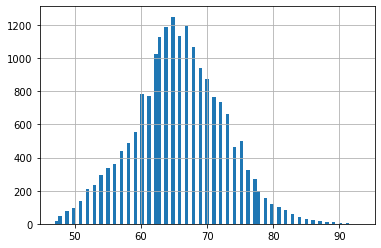

In [401]:
#Visualizacion, histograma
print(df.overall.max()-df.overall.min()+1)
nbins=89
print(df['overall'].unique())
df['overall'].hist(bins = nbins)

In [402]:
#Continuamos con el analisis, son 110 columnas!!!!
df.columns


Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [403]:
#Mejor jugador por posicion
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']]
best_players_per_position.head(3)

,player_positions,short_name,overall
28,CAM,Bruno Fernandes,88
2052,"CAM, CDM",P. Kasami,74
2711,"CAM, CDM, CM",A. Ricaurte,73


In [404]:
#Cantidad de jugador por Posicion
CantPosiciones=pd.DataFrame(df.player_positions.value_counts().sort_index())
CantPosiciones.head(5)

,player_positions
CAM,219
"CAM, CDM",11
"CAM, CDM, CM",4
"CAM, CDM, LM",1
"CAM, CDM, RM",1


In [405]:
#Seleccionamos las columnas mas importantes
n=10000
df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['overall']>70)] # mejores jugadores

skills_ratings = ['pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
      'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes'
       ]

print(len(skills_ratings), 'variables numéricas: skills/habilidades')

df_skills=df_n[skills_ratings]

40 variables numéricas: skills/habilidades


In [406]:
df_skills 

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8
1,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10
2,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11
3,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11
4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,61.0,56.0,67.0,66.0,62.0,58.0,46,55,49,75,37,65,56,65,73,70,63,59,61,68,57,52,61,69,53,64,58,69,67,75,60,73,60,70,46,11,7,13,12,9
4589,67.0,64.0,70.0,72.0,68.0,79.0,66,60,62,73,58,73,73,63,70,70,69,66,74,69,65,73,67,81,77,65,83,70,68,70,66,74,61,74,69,11,8,8,15,8
4590,81.0,51.0,66.0,70.0,66.0,67.0,70,61,49,71,29,71,74,35,69,72,80,82,67,58,65,45,69,73,70,40,50,64,65,59,40,70,68,70,67,12,12,11,15,9
4591,76.0,70.0,60.0,65.0,39.0,71.0,64,74,72,63,58,66,56,49,57,65,79,74,55,70,75,74,68,65,74,63,70,30,73,59,63,59,35,38,34,14,15,14,12,8


In [407]:
#Analizamos datso faltantes por columnas
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4593 entries, 0 to 4592
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pace                         4149 non-null   float64
 1   shooting                     4149 non-null   float64
 2   passing                      4149 non-null   float64
 3   dribbling                    4149 non-null   float64
 4   defending                    4149 non-null   float64
 5   physic                       4149 non-null   float64
 6   attacking_crossing           4593 non-null   int64  
 7   attacking_finishing          4593 non-null   int64  
 8   attacking_heading_accuracy   4593 non-null   int64  
 9   attacking_short_passing      4593 non-null   int64  
 10  attacking_volleys            4593 non-null   int64  
 11  skill_dribbling              4593 non-null   int64  
 12  skill_curve                  4593 non-null   int64  
 13  skill_fk_accuracy 

In [408]:
#hay que imputar datos faltantes
columns_df=df_skills.columns

In [409]:
#Realizamos imputacion por KNNImputer
knn_imputer_df= KNNImputer(n_neighbors=5, weights="uniform")

df_Im=knn_imputer_df.fit_transform(df_skills)


df_skills=pd.DataFrame(data=df_Im, columns=columns_df)
df_skills

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85.0,92.0,91.0,95.0,34.0,65.0,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,78.0,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,93.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,87.0,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,94.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,95.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,91.0,83.0,86.0,94.0,37.0,63.0,85.0,83.0,63.0,86.0,86.0,95.0,88.0,87.0,81.0,95.0,93.0,89.0,96.0,89.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,93.0,93.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,76.0,86.0,93.0,88.0,64.0,78.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,61.0,56.0,67.0,66.0,62.0,58.0,46.0,55.0,49.0,75.0,37.0,65.0,56.0,65.0,73.0,70.0,63.0,59.0,61.0,68.0,57.0,52.0,61.0,69.0,53.0,64.0,58.0,69.0,67.0,75.0,60.0,73.0,60.0,70.0,46.0,11.0,7.0,13.0,12.0,9.0
4589,67.0,64.0,70.0,72.0,68.0,79.0,66.0,60.0,62.0,73.0,58.0,73.0,73.0,63.0,70.0,70.0,69.0,66.0,74.0,69.0,65.0,73.0,67.0,81.0,77.0,65.0,83.0,70.0,68.0,70.0,66.0,74.0,61.0,74.0,69.0,11.0,8.0,8.0,15.0,8.0
4590,81.0,51.0,66.0,70.0,66.0,67.0,70.0,61.0,49.0,71.0,29.0,71.0,74.0,35.0,69.0,72.0,80.0,82.0,67.0,58.0,65.0,45.0,69.0,73.0,70.0,40.0,50.0,64.0,65.0,59.0,40.0,70.0,68.0,70.0,67.0,12.0,12.0,11.0,15.0,9.0
4591,76.0,70.0,60.0,65.0,39.0,71.0,64.0,74.0,72.0,63.0,58.0,66.0,56.0,49.0,57.0,65.0,79.0,74.0,55.0,70.0,75.0,74.0,68.0,65.0,74.0,63.0,70.0,30.0,73.0,59.0,63.0,59.0,35.0,38.0,34.0,14.0,15.0,14.0,12.0,8.0


In [410]:
#Analizamos y luego de la imputacion si hay datos faltantes
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4593 entries, 0 to 4592
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pace                         4593 non-null   float64
 1   shooting                     4593 non-null   float64
 2   passing                      4593 non-null   float64
 3   dribbling                    4593 non-null   float64
 4   defending                    4593 non-null   float64
 5   physic                       4593 non-null   float64
 6   attacking_crossing           4593 non-null   float64
 7   attacking_finishing          4593 non-null   float64
 8   attacking_heading_accuracy   4593 non-null   float64
 9   attacking_short_passing      4593 non-null   float64
 10  attacking_volleys            4593 non-null   float64
 11  skill_dribbling              4593 non-null   float64
 12  skill_curve                  4593 non-null   float64
 13  skill_fk_accuracy 

# Evaluación visual e intuitiva de a dos variables numéricas por vez

In [411]:
#Se realiza evaluacion visual entre las primeras 5 vriables, se pueden modificar y analizar otras.
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5] #5,  2
skill_2=skills_ratings[29]  #29, 4 

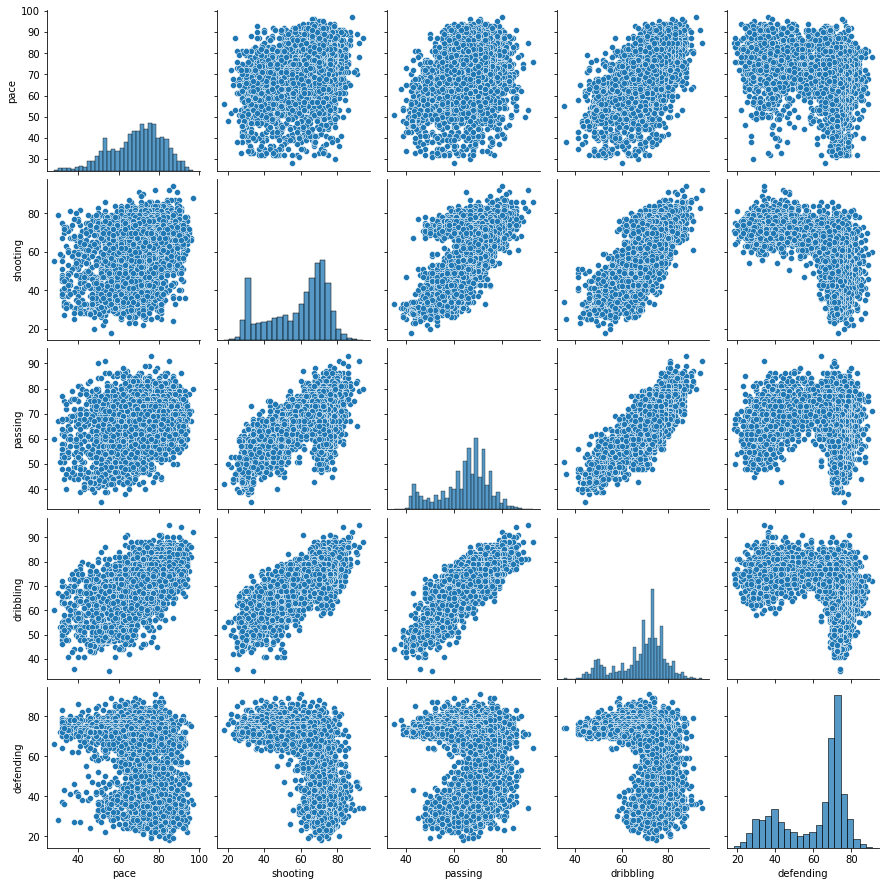

In [412]:
sns.pairplot(df_skills[skills_ratings[0:5]])

### Analizando de a dos variables en forma visual no se pueden distinguir clusters, es necesario utilizar otras herramientas.

# Uso de dos técnicas de clustering

## Clustering por KMEANS
El algoritmo KMeans agrupa los datos tratando de separar muestras en n grupos de igual varianza, minimizando un criterio conocido como inercia o suma de cuadrados dentro del grupo.

In [413]:
# Número de clusters buscados
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades: 40 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_


In [414]:
#Se guarda en la ultima columna el n° de cluster asignado
df_clusters=df_n.copy()
df_clusters['kmeans_5'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,kmeans_5
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,4
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,3
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,4
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,H

In [415]:
#Fitrado para realizar el grafico de los cluster
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

In [416]:
#Grafico de los cluster por KMEANS
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
plot(fig)
iplot(fig)
#fig.show(renderer="colab")

## Observaciones del Gráfico:

Vemos la separacion de 5 Clusters de manera gráfica. Vemos a su vez que el cluster de arqueros se separa claramente del resto de los jugadores. 

## Analizo cantidad de cluster mediante Elbow

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

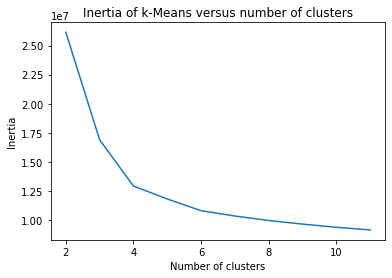

In [417]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

### Segun el analisis de Elbow el numero de cluste es de 4 

## Clustering por Mean Shift

El Clustering de MeanShift tiene como objetivo descubrir manchas en una densidad suave de muestras. Es un algoritmo basado en centroide, que funciona mediante la actualización de candidatos para que los centroides sean la media de los puntos dentro de una región determinada.

In [418]:
#Clustering por Mean Shift
ms = MeanShift(bandwidth=16.39999, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 4588


**Son 4588 clusters por lo que casi todos los clusters esta conformado por solo 1 jugador.**

 **No se logra modificar los hiperparametros para lograr un menor numero de cluster**

In [419]:
#Si bien no tiene mucho sentido realizamos grafico de los cluster mediante Mean Shift
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]

In [420]:
#Grafico de cluster mediante Mean Shift
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
plot(fig)
iplot(fig)
##fig.show(renderer="colab")

### Observaciones del Gráfico:
Aunque seguimos viendo por separado a los arqueros, vemos como este tipo de clustering ha realizado un alto nivel de separación que no aporta a un analisis visual. 

# Evaluación y Análisis de los clusters

### Realizamos Tree Classifier para lograr entender como comienza a formar los cluster, teniendo en cuenta que colocamos en el DF etiquetas de cada cluster

In [421]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [422]:
X_train = df_skills
#X_train=X_train.drop(['kmeans_5'], axis=1)
y_train = df_clusters ['kmeans_5']

In [423]:
clf = DecisionTreeClassifier(random_state=0,max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

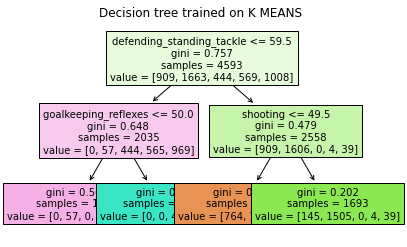

In [424]:
plot_tree(clf, filled=True, fontsize = 10 ,feature_names =X_train.columns)
plt.title("Decision tree trained on K MEANS ")
plt.show()

In [425]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.get_depth()

18

### Observaciones del Tree Classifier
Segun se logra observar comienza diviendo los cluster con los "defending_standing_tackle <=59.5. Luego continua con las variables "shooting" y "goalkeeping_reflexes",continua ya que si bien se realiza el grafico con las primeras dos ramas, la profundidad es de 18.

# Uso de transformación

## T-SNE
**t-SNE : t-distributed Stochastic Neighbor Embedding.**

t-SNE es una herramienta para visualizar datos altamente dimensionales. 

Los "proyecta" en menos dimensiones (2D o 3D) manteniendo la distancia entre ellos.

Consideramos: filas/observaciones $x_i$ y $x_j$ (jugador i y jugador j) en $R^n$.

Comienza convirtiendo distancias entre puntos (observaciones) en probabilidades condicionales. 

$d(x_i,x_j) \rightarrow p(x_j|x_i)$, 

Y luego va acomodando puntos asociados (en el plano 2D o el espacio 2D) que "ajusten" las probabilidades condicionales.

$x'_i$ y $x'_j$ en $R^2$  (para el jugador i y jugador j ) $p(x'_j|x'_i) \leftrightarrow d(x'_i,x'_j)$, 

$p(x_j|x_i) \approx p(x'_j|x'_i)$

El ajuste consiste en minimizar la divergencia Kullback-Leibler entre las probabilidades condicionales establecidas en el espacio de mayor dimension y las determinadas en el espacio de menor dimension. 


El modelo de distribución de probabilidad es el de t-Student 

t-SNE tiene una función de costo que no es convexa, por lo cual diferentes inicializaciones pueden dar diferentes resultados.

In [426]:
# Realizamos embedding mediante T-SNE
df_sne = df_skills
X=df_skills[skills_ratings]

time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4593 samples in 0.001s...
[t-SNE] Computed neighbors for 4593 samples in 0.451s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4593
[t-SNE] Computed conditional probabilities for sample 2000 / 4593
[t-SNE] Computed conditional probabilities for sample 3000 / 4593
[t-SNE] Computed conditional probabilities for sample 4000 / 4593
[t-SNE] Computed conditional probabilities for sample 4593 / 4593
[t-SNE] Mean sigma: 15.088599
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.850410
[t-SNE] KL divergence after 1000 iterations: 1.748815
t-SNE done! Time elapsed: 10.591391563415527 seconds


In [427]:
print(X_tsne.shape)
print(X_tsne)
#X_tsne[1990:2000] #diez jugadores

(4593, 2)
[[-36.112736   -7.8942733]
 [-40.873425  -11.264493 ]
 [-39.867397  -11.347088 ]
 ...
 [ 43.425365   21.469147 ]
 [-64.90252     1.16473  ]
 [ 17.058998    2.4751542]]


In [428]:
#ver donde dice df_n
#Graficamos usado las nuevas variables T-SNE
data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_n.loc[:,'player_positions'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)
plot(fig)
iplot(fig)
##fig.show(renderer="colab")

###  Observaciones del gráfico:
Vemos en el gráfico como los resultados que están catalogados como arqueros, quedan separados del resto de los datos generando un cluster muy identificable visualmente.  

## PCA

### Principal component analysis (PCA).Principal component analysis.


Reducción de la dimensionalidad lineal usando la Descomposición de Valor Singular de los datos para proyectarlos a un espacio dimensional más bajo. Los datos de entrada se centran pero no se escalan para cada característica antes de aplicar el SVD.



In [429]:
from sklearn import (manifold, preprocessing, decomposition)
import time

Realizamos una selección de los datos sin la posición arquero.

In [430]:
n_acp=18000
df_acp=df.loc[:n_acp] #los primeros n
df_acp=df_acp[(df_acp["player_positions"]!='GK')&(df_n['overall']>70)] # mejores jugadores



In [431]:
df_acp

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

**Debido a que los datos en PCA se centran pero no se escalan, vamos a realizar inicialmente la estandarizacion de los mismos.**  

In [432]:
#para realizar PCA es necesario realizar estandarizacion
X_PCA=df_acp[skills_ratings]
std_scale=preprocessing.StandardScaler().fit(X_PCA)
X_scaled=std_scale.transform(X_PCA) # numpyarray Estandarizado (le resta la media y divide por el desvío) por columna
X=X_PCA

In [433]:
pca=decomposition.PCA(n_components=2) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.375221   0.14346307]
proporción de varianza por componente acumulada:  [0.375221   0.51868407]
tamaño de los datos:  (4149, 2)


In [434]:
pcs=pca.components_  #"composición" de las primeras componentes, 
print(pcs)  # el aporte/pesos de las variables: skills_ratings

[[-1.35062604e-01 -2.29981538e-01 -1.96450546e-01 -2.35956145e-01
   1.64488734e-01  1.30974733e-01 -1.74384178e-01 -2.22221642e-01
   1.18888098e-01 -1.28979933e-01 -2.10562726e-01 -2.30225226e-01
  -2.09063990e-01 -1.80343040e-01 -6.56137335e-02 -2.10806232e-01
  -1.50996047e-01 -1.14046342e-01 -1.92252447e-01 -7.39228383e-02
  -1.66886962e-01 -1.74465347e-01  7.35606943e-02 -2.81011396e-02
   1.35854098e-01 -2.15639743e-01  1.23672420e-01  1.48493851e-01
  -2.25052244e-01 -2.08696106e-01 -1.79540104e-01 -1.09315616e-01
   1.56220864e-01  1.55254434e-01  1.59773884e-01  3.65061146e-03
  -2.75267687e-05 -2.36683819e-03  6.46363436e-03 -3.79573022e-04]
 [ 8.90074963e-02  1.26565392e-02 -2.43789048e-01 -9.16677305e-02
  -3.01508166e-01 -1.38113815e-01 -1.52087133e-01  5.60735575e-02
  -1.18517182e-02 -2.87486225e-01  2.12380271e-02 -6.64495212e-02
  -1.11485783e-01 -1.11279141e-01 -3.24008783e-01 -1.42323716e-01
   7.83439283e-02  9.30657655e-02  8.28549630e-03 -1.98905336e-01
  -3.7764

In [435]:
#Realizamos grafico con las dos nuevas variables
data=[]

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=X.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)
plot(fig)
iplot(fig)

#fig.show(renderer="colab")

In [436]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
#Lo agregamos a la base:
df_acp=df_acp.append(MachineGunDict,ignore_index=True)
X=df_acp[skills_ratings] # Datos sin estandarizar
X_scaled=std_scale.transform(X) # volvemos a estandarizar con el dato agregado 
#pero con la estandarización de la base sin el dato nuevo
X_projected=pca.transform(X_scaled) # volvemos a proyectar pero con el dato nuevo

In [437]:
#Graph 2
#Choose your player
recherche_joueur=df_acp["short_name"]=='L. Messi'

bool_crack=df_acp["overall"] > 85
bool_no_crack=df_acp["overall"]<86
bool_machinegun=df_acp["short_name"]=='MachineGun'

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Crack',
                      text=df_acp.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

acp_no_crack =go.Scatter(x=X_projected[bool_no_crack,0], y=X_projected[bool_no_crack,1],name='Average player',
                         text=df_acp.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

acp_machinegun =go.Scatter(x=X_projected[bool_machinegun,0], y=X_projected[bool_machinegun,1],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=X_projected[recherche_joueur,0], y=X_projected[recherche_joueur,1],name='Searched player',
                           text=df_acp.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[acp_no_crack,acp_crack,acp_machinegun,joueur_recherche]

layout = go.Layout(title="ACP - Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=750)

fig = go.Figure(data=data, layout=layout)

plot(fig)
iplot(fig)

In [438]:
#En Colab
#fig.show(renderer="colab")

### Observaciones del gráfico:
Observamos como los datos son ubicados en un espacio de dos dimensiones. Identificamos en el grafico a los catalogados como Crack, al MachineGun (jugador con la maxima puntuacion en todos sus atributos), al Jugador Leo Messi y al resto de los jugadores. Vemos que el MachineGun se separa de los datos porque entre sus atributos estan los de arquero, posicion no incluida en la base de datos observada. 